# EXPLORATORY DATA ANALYSIS

## Data Cleaning

In [2]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_client_train = pd.read_csv('../data/raw/client_train.csv')

In [4]:
zip_path = "../data/raw/invoice_train.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    csv_filename = zip_ref.namelist()[0]
    with zip_ref.open(csv_filename) as csv_file:
        df_transactions_train = pd.read_csv(csv_file)

C:\Users\djidj\AppData\Local\Temp\ipykernel_17016\2424842538.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_transactions_train = pd.read_csv(csv_file)


In [5]:
df_client_train1 = df_client_train.copy()
df_transactions_train1 = df_transactions_train.copy()

In [6]:
df_transactions_train_filtered = df_transactions_train1[df_transactions_train1['counter_type'] == 'ELEC']
df_transactions_train_v1 = df_transactions_train_filtered.iloc[:,:-1]

In [7]:
def deplacer_colonnes(dfs, col_names, pos):
    if not isinstance(dfs, list):
        dfs = [dfs]
        single_input = True
    else:
        single_input = False
    
    if isinstance(col_names, str):
        col_names = [col_names]
    
    if isinstance(pos, int):
        pos = [pos]
    
    if len(col_names) != len(pos):
        raise ValueError("La liste des colonnes et la liste des positions doivent avoir la même longueur.")
    
    dfs_modifies = []
    
    for df in dfs:
        df_copy = df.copy()
        temp_cols = {col:df_copy.pop(col) for col in col_names}
        for col, ps in zip(col_names, pos):
            df_copy.insert(ps, col, temp_cols[col])
        dfs_modifies.append(df_copy)
    return dfs_modifies[0] if single_input else dfs_modifies

df_client_train1 = deplacer_colonnes(df_client_train1, 'client_id',0)

In [8]:
df_client_train1.isnull().sum()

client_id        0
disrict          0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

In [9]:
df_transactions_train_v1.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
dtype: int64

In [10]:
df_client_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   client_id      135493 non-null  object 
 1   disrict        135493 non-null  int64  
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [11]:
df_transactions_train_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3079406 entries, 0 to 4476748
Data columns (total 15 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
dtypes: int64(12), object(3)
memory usage: 375.9+ MB


In [12]:
df_client_train1.rename(columns={'disrict': 'district'}, inplace=True)

In [13]:
df_transactions_train_v1.sort_values(by=['client_id', 'invoice_date'], inplace=True)
df_transactions_train_v1.reset_index(drop=True, inplace=True)

In [14]:
df_client_train1['creation_date'] = pd.to_datetime(df_client_train1['creation_date'], format= 'mixed', dayfirst=True)
df_transactions_train_v1['invoice_date'] = pd.to_datetime(df_transactions_train_v1['invoice_date'])

In [15]:
def convert_to_category(df, col_names):
    for col in col_names:
        df[col] = df[col].astype('category')
    return df

df_client_train1 = convert_to_category(df_client_train1, ['district','client_catg','region'])
df_transactions_train_v1 = convert_to_category(df_transactions_train_v1, ['tarif_type','counter_statue', 'counter_coefficient'])

In [16]:
df_transactions_train_v1['months_number'] = df_transactions_train_v1['invoice_date'].dt.month

In [121]:
df_transactions_train_v1['counter_statue'].value_counts()

counter_statue
0    2750685
1      36161
0      19944
5       8772
4       2152
1        254
3        157
5         66
4         18
2          7
Name: count, dtype: int64

In [40]:
list1 = df_transactions_train_v1[(df_transactions_train_v1['counter_statue'] == 'A') | (df_transactions_train_v1['counter_statue'].isin([46, 618, 269375, 769]))]['client_id'].unique()

In [41]:
df_transactions_train_v1 = df_transactions_train_v1[~(df_transactions_train_v1['client_id'].isin(list1))]

In [120]:
df_transactions_train_v1['counter_statue'] = df_transactions_train_v1['counter_statue'].cat.remove_unused_categories()

In [125]:
df_transactions_train_v1['reading_remarque'].value_counts()

reading_remarque
6    1346717
9     980220
8     490710
7        569
Name: count, dtype: int64

In [47]:
df_transactions_train_v1['concat']= df_transactions_train_v1['client_id'] + df_transactions_train_v1['invoice_date'].astype(str)

C:\Users\djidj\AppData\Local\Temp\ipykernel_17016\1807958492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_train_v1['concat']= df_transactions_train_v1['client_id'] + df_transactions_train_v1['invoice_date'].astype(str)


In [50]:
df_transactions_train_v1.drop_duplicates(subset='concat', keep='first', inplace=True)

C:\Users\djidj\AppData\Local\Temp\ipykernel_17016\3461530793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_train_v1.drop_duplicates(subset='concat', keep='first', inplace=True)


In [51]:
df_transactions_train_v1.drop('concat', axis=1, inplace=True)

C:\Users\djidj\AppData\Local\Temp\ipykernel_17016\4016128331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_train_v1.drop('concat', axis=1, inplace=True)


In [56]:
df_transactions_train_v1['consommation_total'] = abs(df_transactions_train_v1['new_index'] - df_transactions_train_v1['old_index'])

C:\Users\djidj\AppData\Local\Temp\ipykernel_17016\1734559015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_train_v1['consommation_total'] = abs(df_transactions_train_v1['new_index'] - df_transactions_train_v1['old_index'])


In [57]:
df_transactions_train_v1['conso_level'] = df_transactions_train_v1['consommation_level_1'] + df_transactions_train_v1['consommation_level_2']+ df_transactions_train_v1['consommation_level_3']+ df_transactions_train_v1['consommation_level_4']

C:\Users\djidj\AppData\Local\Temp\ipykernel_17016\889934558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_train_v1['conso_level'] = df_transactions_train_v1['consommation_level_1'] + df_transactions_train_v1['consommation_level_2']+ df_transactions_train_v1['consommation_level_3']+ df_transactions_train_v1['consommation_level_4']


In [66]:
df_transactions_train_v1['ecart'] = df_transactions_train_v1['consommation_total'] - df_transactions_train_v1['conso_level']

C:\Users\djidj\AppData\Local\Temp\ipykernel_17016\2144507793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_train_v1['ecart'] = df_transactions_train_v1['consommation_total'] - df_transactions_train_v1['conso_level']


In [95]:
list2 = df_transactions_train_v1[df_transactions_train_v1['ecart']!=0]['client_id'].unique().tolist()

In [ ]:
df_transactions_train_v1 = df_transactions_train_v1[~(df_transactions_train_v1['client_id'].isin(list2))]

In [115]:
df_transactions_train_v1['counter_coefficient'].value_counts()

counter_coefficient
1     2818213
20          3
Name: count, dtype: int64

In [114]:

df_transactions_train_v1['counter_coefficient'] = df_transactions_train_v1['counter_coefficient'].cat.remove_unused_categories()

In [139]:
list3 = df_transactions_train_v1['client_id'].unique().tolist()

In [141]:
df_client_train1 = df_client_train1[df_client_train1['client_id'].isin(list3)]

In [117]:
df_transactions_train_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2818216 entries, 0 to 3079405
Data columns (total 19 columns):
 #   Column                Dtype         
---  ------                -----         
 0   client_id             object        
 1   invoice_date          datetime64[ns]
 2   tarif_type            category      
 3   counter_number        int64         
 4   counter_statue        category      
 5   counter_code          int64         
 6   reading_remarque      int64         
 7   counter_coefficient   category      
 8   consommation_level_1  int64         
 9   consommation_level_2  int64         
 10  consommation_level_3  int64         
 11  consommation_level_4  int64         
 12  old_index             int64         
 13  new_index             int64         
 14  months_number         int32         
 15  consommation_total    int64         
 16  conso_level           int64         
 17  ecart                 int64         
 18  conso_incoherente     bool          
dtypes: bo

In [149]:
df_transactions_train_v1.to_csv('../data/processed/df_transactions_train_processed.csv', index=False)
df_client_train1.to_csv('../data/processed/df_client_train_processed.csv', index=False)

## ANALYSE UNIVARIEE

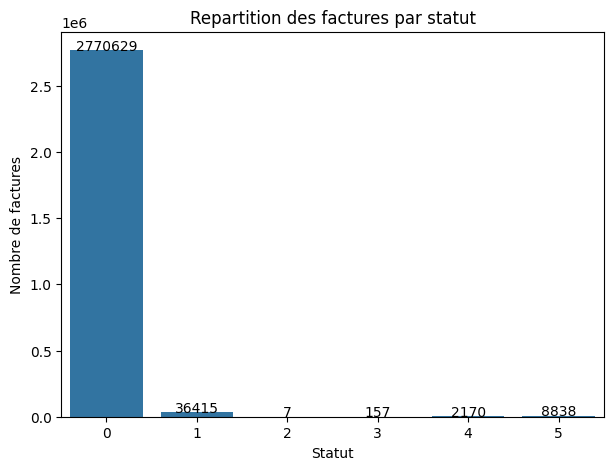

In [122]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='counter_statue', data=df_transactions_train_v1)
plt.title('Repartition des factures par statut')
plt.xlabel('Statut')
plt.ylabel('Nombre de factures')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.show()

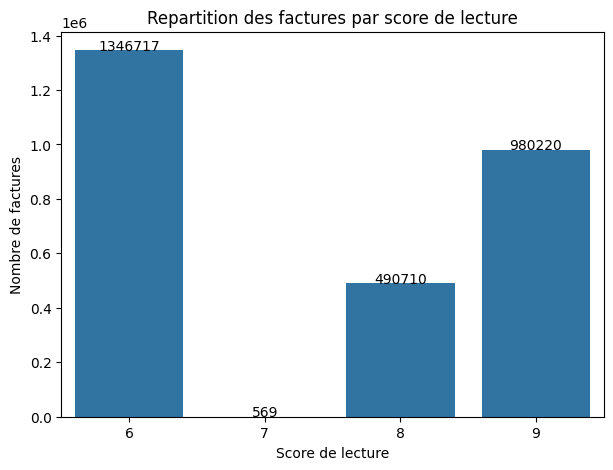

In [126]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='reading_remarque', data=df_transactions_train_v1)
plt.title('Repartition des factures par score de lecture')
plt.xlabel('Score de lecture')
plt.ylabel('Nombre de factures')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.show()

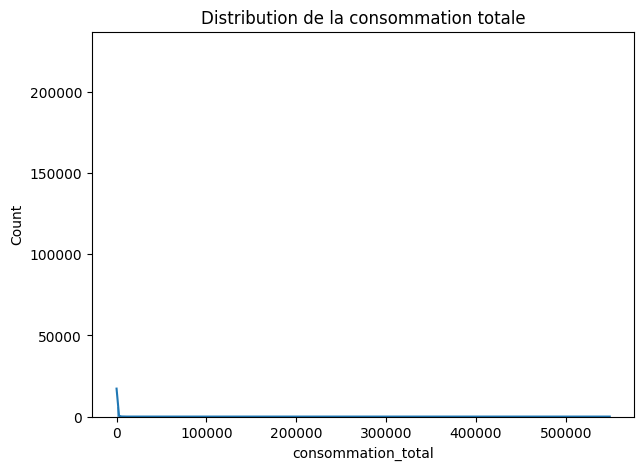

In [128]:
plt.figure(figsize=(7,5))
sns.histplot(x='consommation_total', data=df_transactions_train_v1, kde=True)
plt.title('Distribution de la consommation totale')
plt.show()

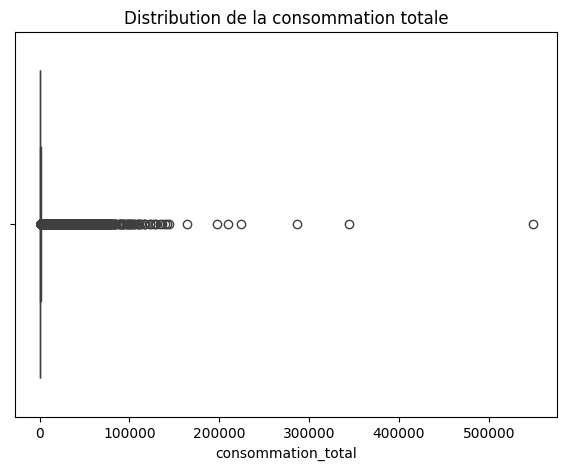

In [129]:
plt.figure(figsize=(7,5))
sns.boxplot(x='consommation_total', data=df_transactions_train_v1)
plt.title('Distribution de la consommation totale')
plt.show()

In [132]:
df_transactions_train_v1['consommation_total'].describe()

count    2.818216e+06
mean     7.342767e+02
std      1.524757e+03
min      0.000000e+00
25%      2.310000e+02
50%      4.590000e+02
75%      8.010000e+02
max      5.489460e+05
Name: consommation_total, dtype: float64

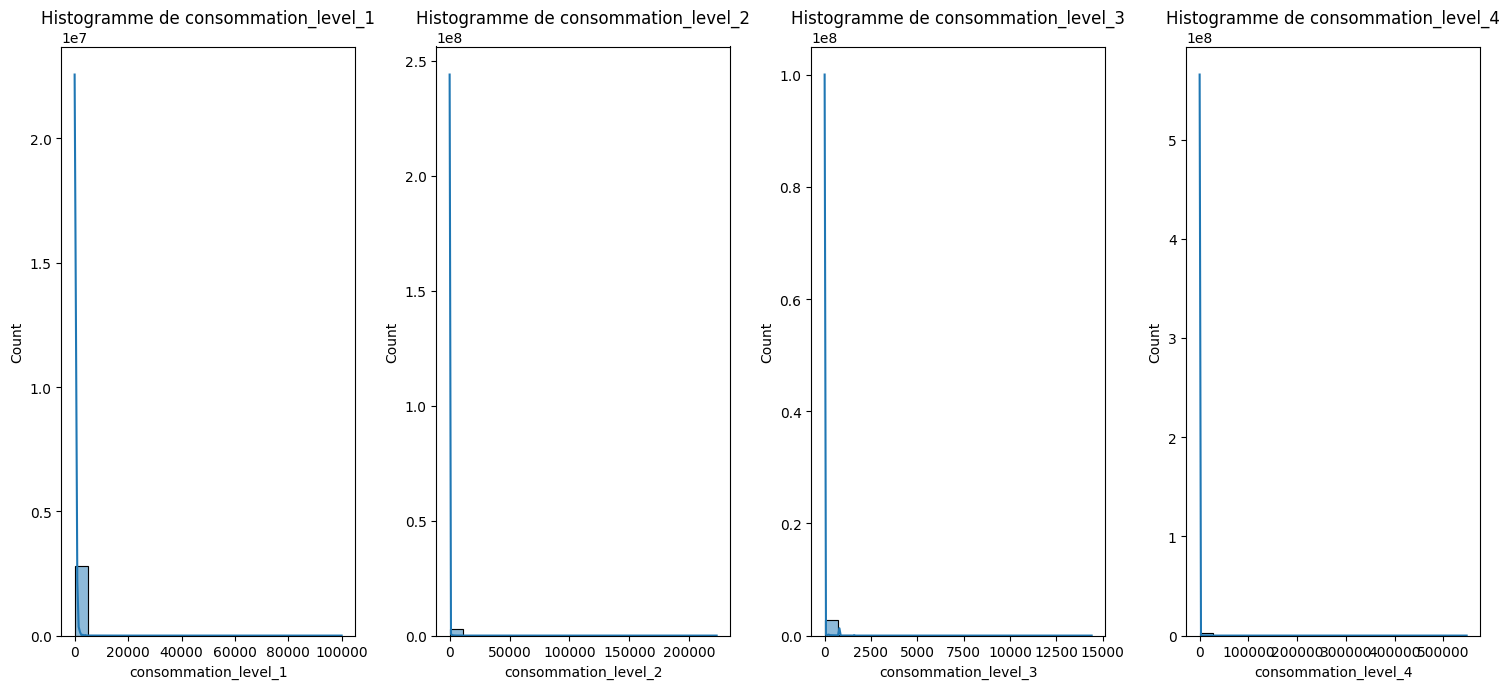

In [ ]:
colonnes_conso_level = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']
fig, axes = plt.subplots(1, 4, figsize=(15, 7))

for t, col2 in enumerate(colonnes_conso_level):
    sns.histplot(x=col2, data=df_transactions_train_v1, bins=20, kde=True, ax=axes[t])
    axes[t].set_title(f'Histogramme de {col2}')
    
plt.tight_layout()
plt.show()

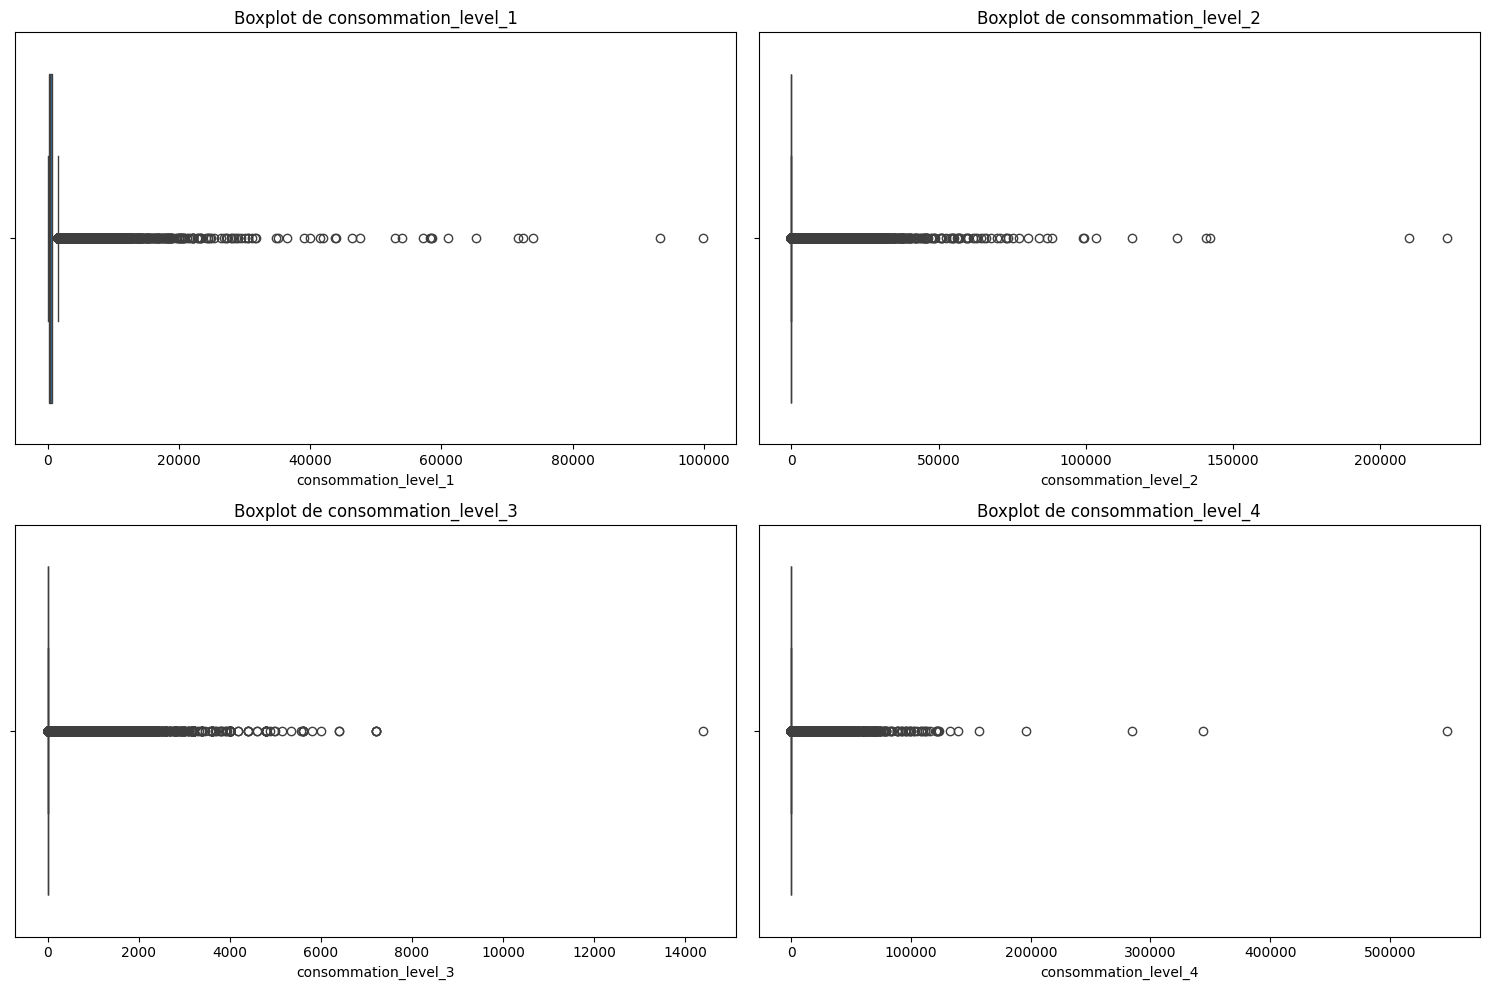

In [135]:
colonnes_level_box = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(colonnes_level_box):
    sns.boxplot(x=col, data=df_transactions_train_v1, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {col}')
    
plt.tight_layout()
plt.show()

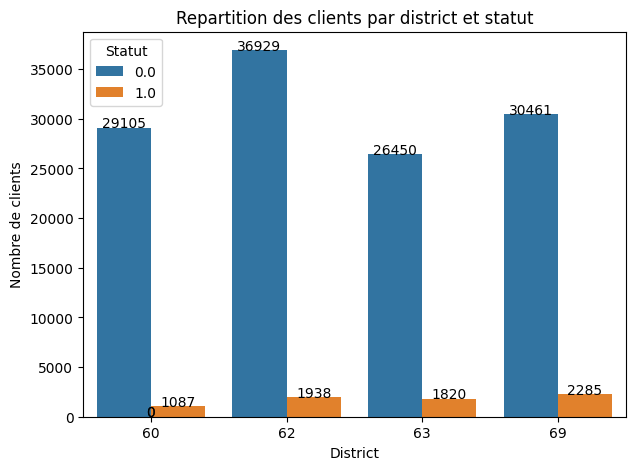

In [143]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='district', hue='target', data=df_client_train1)
plt.title('Repartition des clients par district et statut')
plt.xlabel('District')
plt.ylabel('Nombre de clients')
plt.legend(title = 'Statut')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.show()

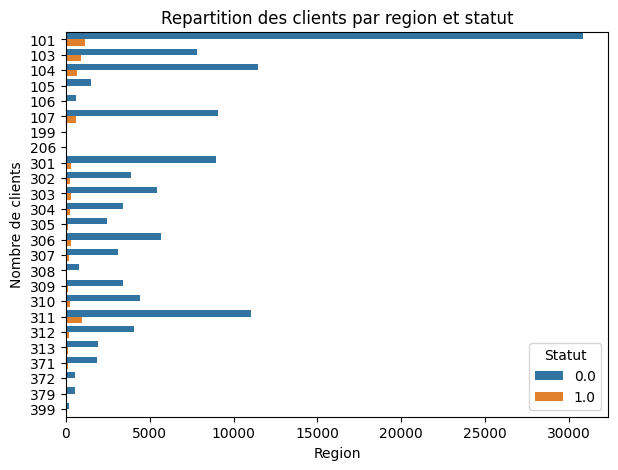

In [144]:
plt.figure(figsize=(7,5))
ax = sns.countplot(y='region', hue='target', data=df_client_train1)
plt.title('Repartition des clients par region et statut')
plt.xlabel('Region')
plt.ylabel('Nombre de clients')
plt.legend(title = 'Statut')
plt.show()

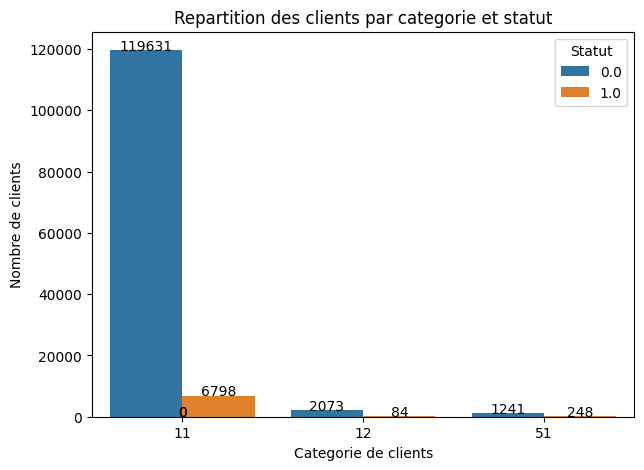

In [145]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='client_catg', hue='target', data=df_client_train1)
plt.title('Repartition des clients par categorie et statut')
plt.xlabel('Categorie de clients')
plt.ylabel('Nombre de clients')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.0f}'.format(height), ha="center")
plt.legend(title = 'Statut')
plt.show()